# <center> DSC 350 - Week 7 - Exercise 7
***
## Alana D'Agostino
### Professor Kinney
Textbook Reference: __[Hands-On Data Analysis with Pandas (2nd Ed.) - Ch. 5](https://github.com/AlanaDAg/Hands-On-Data-Analysis-with-Pandas-2nd-edition/tree/master/ch_05)__ <br>
Textbook Data Directory: __[Chapter 5 Exercises Data Directory (GitHub)](https://github.com/AlanaDAg/Hands-On-Data-Analysis-with-Pandas-2nd-edition/tree/master/ch_05/data)__
***

In [2]:
# Code attribution
/
# ========================================================================================
# Title: "Hands-On Data Analysis with Pandas (Second Edition), Chapter 5
# Author: Stefanie Molin
# Date: 28 April 2024
# Modified By: Alana D'Agostino (DSC 350 - Week 7 - Exercise 7)
# Description: This program follows the exercises outlined in Stefanie Molin's Book 
## "Hands-On Data Analysis with Pandas (2nd Ed.),"
## through Chapter 5. Visualizing Pandas DataFrames using Matplotlib
## (boxplots, bar graphs, plots & subplots, line graphs, & customizations)
# ========================================================================================
/

()

# <center><font color=blue>Chapter 5</font> <br><font color=mediumblue>**Visualizing Data with Pandas and Matplotlib**

***
### <center><font color=#00ad43>**Create the following visualizations using what you have learned up to this point in this book. <br>Use the data from this chapter's `data/` directory:**
***
#### <center><font color=darkgreen>**Page 320, Exercises 1-4, and 6**
***

***
# <font color=blue>**1.**</font> **Visualizing:** <center> Rolling Minimum

> <font color=deeppink>Plot the rolling 20-day minimum of the Facebook closing price using `pandas`.

In [3]:
# Prepare Notebook

# Enable inline plotting
# %matplotlib inline

# Import libraries (matplotlib, numpy, and pandas)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read in data (Facebook)
## Define the index as 'date' column and 
Facebook = pd.read_csv('https://github.com/AlanaDAg/'
                       'Hands-On-Data-Analysis-with-Pandas-2nd-edition/blob/master/'
                       'ch_05/data/fb_stock_prices_2018.csv?raw=True', 
                       index_col='date', parse_dates=True)

# Display Facebook DataFrame info
print(Facebook.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-01-02 to 2018-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    251 non-null    float64
 1   high    251 non-null    float64
 2   low     251 non-null    float64
 3   close   251 non-null    float64
 4   volume  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB
None


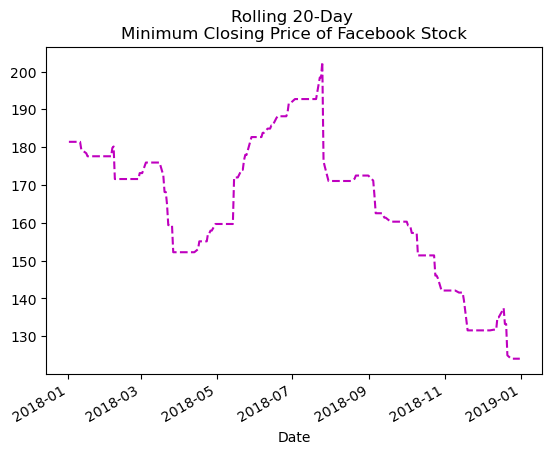

In [4]:
# Create plot
## Make a subtitle using the '\n' newline character & customize plot aesthetics
rolling_20D = Facebook.close.rolling('20D').min().plot(
    title='Rolling 20-Day \nMinimum Closing Price of Facebook Stock',
    c='m', ls='--', xlabel='Date'
)

# Display plot
plt.show()

### **Notes:**
> On **%matplotlib inline:** <br>
>> Matplotlib inline is a **backend package** that supports the matplotlib library which allows you to display plots directly within and save to Jupyter Notebooks (inline). <br><br>
>> %matplotlib is what is called a **magic function**, which are "a special type of function in IPython that allow for advanced functionality and convenient shortcuts within the interactive Python environment" (Goel).
> * The current versions of Jupyter Notebook, enabling matplotlib inline isn't necessary. It is helpful when sharing code, however. 

### **Sources:**

> **Supplemental:**
* matplotlib: __[matplotlib.pyplot.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)__ (Accessed: 2024, April)
* pandas.pydata: __[How to use matplotlib plot inline?](https://www.geeksforgeeks.org/how-to-use-matplotlib-plot-inline/)__ (2023, November 29) <br>
* Data Camp: __[Exploring Matplotlib Inline: A Quick Tutorial](https://www.datacamp.com/tutorial/exploring-matplotlib-inline-a-quick-tutorial)__ <u>Amberle McKee</u> (2024, April) <br>
* Naukri: __[What is Matplotlib Inline in Python?](https://www.naukri.com/code360/library/what-is-matplotlib-inline-in-python)__ <u>Nikunj Goel</u> (2024, March 26)

***
***
# <font color=blue>**2.**</font> **EDIT ME:** <center> EDIT ME

> <font color=deeppink> Create a histogram and KDE of the change from open to close in the price of Facebook stock.

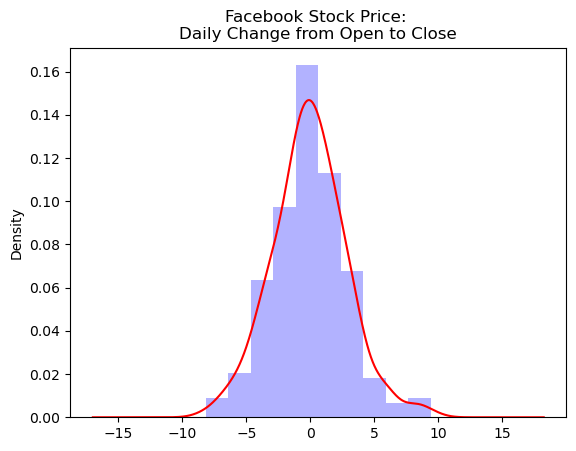

In [5]:
# Create custom differential equation for price of Facebook stock

stock_change_FB = Facebook.open - Facebook.close

# Create histogram plot as object for KDE plot
ax = stock_change_FB.plot(kind='hist', density=True, alpha=0.3, color='blue')

# Create KDE plot using histogram object defined above
## Customize title and axis labels
stock_change_FB.plot(
    kind='kde', c='red', ax=ax,
    title='Facebook Stock Price: \nDaily Change from Open to Close',
    ylabel='Density'
)

# Display combined histogram and KDE plot
plt.show()

### **Sources:**

> **Supplemental:**
* pandas.pydata: __[pandas.DataFrame.plot.kde](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html)__ <br>

***
***
# <font color=blue>**3.**</font> **Visualizing Data:** <center> Boxplots

> <font color=deeppink>Using the `earthquake` data, create box plots for the magnitudes of each `magType` used in Indonesia.

In [6]:
# Read in data (earthquakes)
earthquakes = pd.read_csv('https://github.com/AlanaDAg/'
                          'Hands-On-Data-Analysis-with-Pandas-2nd-edition/blob/'
                          'master/ch_05/data/earthquakes.csv?raw=True')

# Display earthquakes DataFrame info
print(earthquakes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9332 entries, 0 to 9331
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mag           9331 non-null   float64
 1   magType       9331 non-null   object 
 2   time          9332 non-null   int64  
 3   place         9332 non-null   object 
 4   tsunami       9332 non-null   int64  
 5   parsed_place  9332 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 437.6+ KB
None


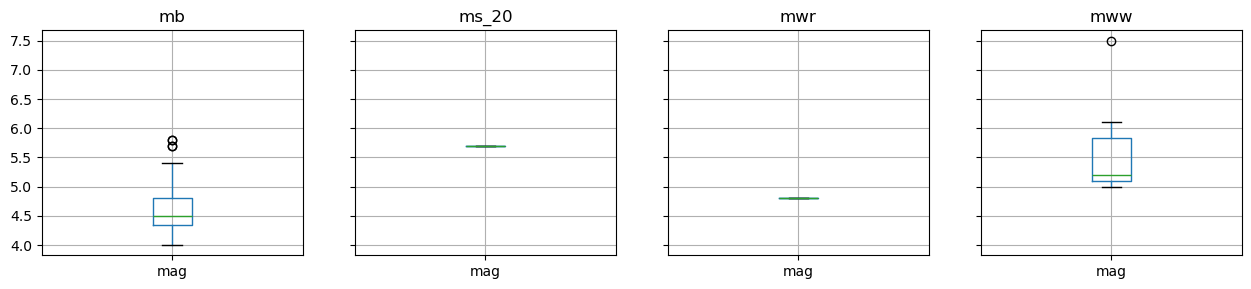

In [7]:
# Use .query() function to slice the data (by magType and parsed_place=Indonesia
## Set as object
query = earthquakes.query('parsed_place == "Indonesia"')[['mag', 'magType']]\
.groupby('magType')

# Set query defined above as boxplot
query.boxplot(layout=(1, 4), figsize=(15, 3))
# Display boxplots
plt.show()

### **Sources:**

> **Supplemental:**
* GeeksforGeeks: __[Box Plot in Python using Matplotlib](https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/)__ <br>

***
***
# <font color=blue>**4.**</font> **Visualizing Data:** <center> Line Plot

> <font color=deeppink>Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook.
> > **NOTE:** <center><font color=purple>This should be a single line

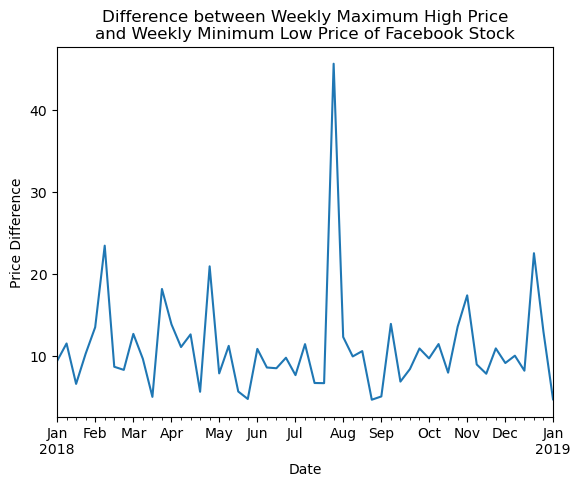

In [8]:
# First resample the Facebook dataset
resample_FB = Facebook.resample('1W').agg(
    dict(high='max', low='min')
).assign(
    max_change_weekly=lambda x: x.high - x.low    # Lambda function to customize plot
).max_change_weekly.plot(     # Set line plot aesthetics (title & axis labels)
    title='Difference between Weekly Maximum High Price\n' 
          'and Weekly Minimum Low Price of Facebook Stock', 
    xlabel='Date',
    ylabel='Price Difference'
)

# Display line plot
plt.show()

### **Sources:**

> **Supplemental:**
* matplotlib: __[plot a lambda function?](https://discourse.matplotlib.org/t/plot-a-lambda-function/13236/4)__ <br>
* GeeksforGeeks: __[Applying Lambda functions to Pandas Dataframe](https://www.geeksforgeeks.org/applying-lambda-functions-to-pandas-dataframe/)__ <br>

> <font color=blue>**b.** <font color=deeppink>The second subplot will be a bar plot showing the net effect this had monthly, using `resample()`.

<font color=black><center>**BONUS #1**

> <font color=blue>**c.** <font color=deeppink>Color the bars according to whether there are <font color=green>**gains**</font> in the stock price <font color=green>(**green**)</font> or <font color=red>**drops**</font> in the stock price <font color=red>(**red**)</font>.

<font color=black><center>**BONUS #2**

> <font color=blue>**d.**</font> <font color=deeppink>Modify the *x*-axis of the bar plot to show the three-letter abbreviation for the month.

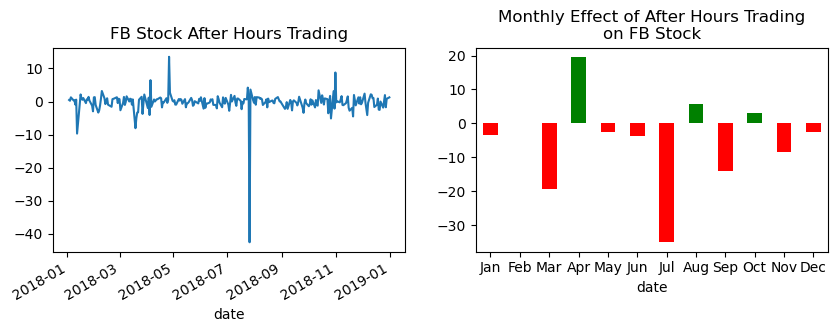

In [9]:
# Create objects for both plots
## Custom function
select_series = (Facebook.open - Facebook.close.shift())
# Object using resample()
afterhours_trading = select_series.resample('1M').sum()

# Define subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Create plot line plot using first custom function
select_series.plot(
    ax=axes[0],
    title='FB Stock After Hours Trading')

# Create subplot using the afterhours_trading object
afterhours_trading.index = afterhours_trading.index.strftime('%b')
afterhours_trading.plot(
    ax=axes[1],
    kind='bar',
    # Customize aesthetics of plot (title, color, and axis rotation)
    title='Monthly Effect of After Hours Trading\non FB Stock',
    # BONUS \#1 = Colors
    color=np.where(afterhours_trading >= 0, 'g', 'r'),  
    # Bonus \#2 = x-axis modification
    rot=0)     


# Display plot and subplot
plt.show()

### **Sources:**

> **Supplemental:**
* w3schools: __[Matplotlib Subplot](https://www.w3schools.com/python/matplotlib_subplot.asp)__ <br>
* w3schools: __[Matplotlib.pyplot.subplots() in Python](https://www.geeksforgeeks.org/matplotlib-pyplot-subplots-in-python/)__ <br>
* Python Graph Gallery: __[Control the color of barplots built with matplotlib](https://python-graph-gallery.com/3-control-color-of-barplots/)__ <br>
* Python Graph Gallery: __[How to Rotate X-Axis Tick Label Text in Matplotlib?](https://www.geeksforgeeks.org/how-to-rotate-x-axis-tick-label-text-in-matplotlib/)__ <br>

---
___
***